In [15]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import numpy as np

from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self,X):
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i]==1:
                pred[i]=0
            else:
                pred[i]=1
        return pred

In [2]:
# # Null 처리 함수
# def fillna(df):
#     df["Age"].fillna(df["Age"].mean(), inplace=True)
#     df["Cabin"].fillna('N',inplace=True)
#     df["Embarked"].fillna('N',inplace=True)
#     return df

# # 머신러닝 알고리즘에 불필요한 피처 제거
# def drop_features(df):
#     df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)
#     return df

# # 레이블 인코딩 수행
# def format_features(df):
#     df.Embarked = df.Embarked.str[:1]
#     features=["Cabin","Sex","Embarked"]
#     for feature in features:
#         le = LabelEncoder()
#         le = le.fit(df[feature])
#         df[feature]=le.transform(df[feature])
#     return df

# # 앞에서 설정한 데이터 전처리 함수 호출
# def transform_features(df):
#     df = fillna(df)
#     df = drop_features(df)
#     df = format_features(df)
#     return df

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv("./타이타닉_생존자예측/train.csv")
y_titanic_df = titanic_df["Survived"]
X_titanic_df = titanic_df.drop("Survived",axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,
                                                 y_titanic_df,
                                                 train_size=0.2,
                                                 random_state=0)

myclf = MyDummyClassifier()
myclf.fit(X_train,y_train)
mypred = myclf.predict(X_test)
print("{:.4f}".format(accuracy_score(y_test,mypred)))

# 매우 간단한 알고리즘으로 예측해도 80% 가까운 정확도를 보여준다
# 이진분류는 정확도 외에 다른 평가지표가 필요!

0.7840


In [7]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split 
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator): 
    def fit(self, X, y):
        pass
#입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 값 으로 만들어서 반환 
    def predict(self, X):
        return np.zeros( (len(X), 1), dtype=bool)
#사이킷런의 내장 데이터 세트인 load_digits( )를 이용해 MNIST 데이터 로딩
digits = load_digits()
#digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환.
y = (digits.target == 7).astype(int) 
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

In [10]:
#불균형한 레이블 데이터 분포도 확인. 
print('레이블 테스트 세트 크기 :', y_test.shape) 
print('테스트 세트 레이블 0 과 1의 분포도') 
print(pd.Series(y_test).value_counts())
# Dummy Classifier로 학습/예측/정확도 평가 
fakeclf = MyFakeClassifier() 
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:3f}'.format(accuracy_score(y_test,fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0 과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900000


## 오차 행렬

In [11]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,fakepred)

array([[405,   0],
       [ 45,   0]])

In [12]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,confusion_matrix

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    print("오차행렬")
    print(confusion)
    print('정확도 : {0:.4f},정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy,precision,recall))

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv("./타이타닉_생존자예측/train.csv")
y_train_df = titanic_df["Survived"]
X_titanic_df = titanic_df.drop("Survived",axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,y_titanic_df,
                                                 test_size=0.2,random_state=11)

lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차행렬
[[108  10]
 [ 16  45]]
정확도 : 0.8547,정밀도 : 0.8182, 재현율 : 0.7377


In [22]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print(pred_proba.shape)
print(pred_proba[:3])

pred_proba_result= np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)
print(pred_proba_result)

(179, 2)
[[0.45394754 0.54605246]
 [0.86558975 0.13441025]
 [0.8656981  0.1343019 ]]
[[0.45394754 0.54605246 1.        ]
 [0.86558975 0.13441025 0.        ]
 [0.8656981  0.1343019  0.        ]
 [0.83841217 0.16158783 0.        ]
 [0.80860513 0.19139487 0.        ]
 [0.83080999 0.16919001 0.        ]
 [0.87314056 0.12685944 0.        ]
 [0.27195146 0.72804854 1.        ]
 [0.76782602 0.23217398 0.        ]
 [0.31313609 0.68686391 1.        ]
 [0.85212166 0.14787834 0.        ]
 [0.87315067 0.12684933 0.        ]
 [0.86565662 0.13434338 0.        ]
 [0.87281054 0.12718946 0.        ]
 [0.61669823 0.38330177 0.        ]
 [0.85255407 0.14744593 0.        ]
 [0.89064168 0.10935832 0.        ]
 [0.72744111 0.27255889 0.        ]
 [0.70155794 0.29844206 0.        ]
 [0.23617606 0.76382394 1.        ]
 [0.74250973 0.25749027 0.        ]
 [0.63602359 0.36397641 0.        ]
 [0.849056   0.150944   0.        ]
 [0.82679325 0.17320675 0.        ]
 [0.87012291 0.12987709 0.        ]
 [0.75706799 0.

In [25]:
# 정밀도/재현율 트레이드오프 방식
# 임계값 설정
from sklearn.preprocessing import Binarizer

custom_threshold = 0.4

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차행렬
[[98 20]
 [11 50]]
정확도 : 0.8268,정밀도 : 0.7143, 재현율 : 0.8197


In [28]:
thresholds = [0.4,0.45,0.5,0.55,0.6]

def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임계값:",custom_threshold)
        get_clf_eval(y_test,custom_predict)

get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임계값: 0.4
오차행렬
[[98 20]
 [11 50]]
정확도 : 0.8268,정밀도 : 0.7143, 재현율 : 0.8197
임계값: 0.45
오차행렬
[[106  12]
 [ 14  47]]
정확도 : 0.8547,정밀도 : 0.7966, 재현율 : 0.7705
임계값: 0.5
오차행렬
[[108  10]
 [ 16  45]]
정확도 : 0.8547,정밀도 : 0.8182, 재현율 : 0.7377
임계값: 0.55
오차행렬
[[111   7]
 [ 17  44]]
정확도 : 0.8659,정밀도 : 0.8627, 재현율 : 0.7213
임계값: 0.6
오차행렬
[[113   5]
 [ 18  43]]
정확도 : 0.8715,정밀도 : 0.8958, 재현율 : 0.7049


In [32]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

precisions,recalls, thresholds = precision_recall_curve(y_test,pred_proba_class1)
print(thresholds.shape)

thr_index = np.arange(0,thresholds.shape[0],15)

(145,)


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


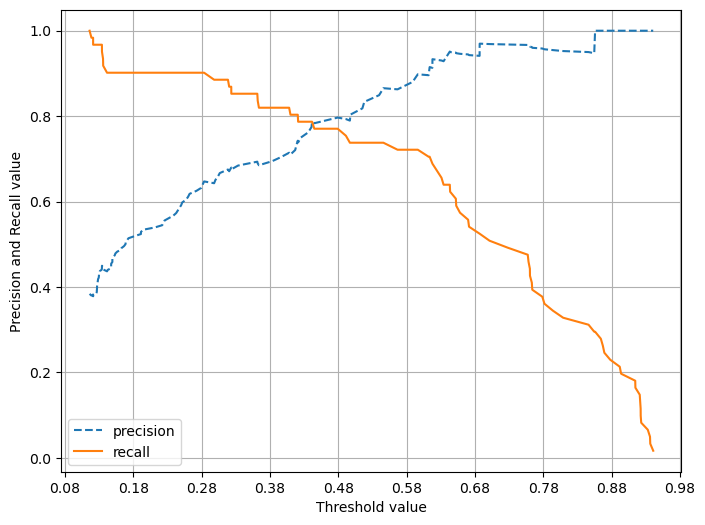

In [33]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test,pred_proba_c1):
    precisions, recalls,thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--', label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary], label='recall')
    
    start,end = plt.xlim() # x값 범위 지정
    plt.xticks(np.round(np.arange(start,end,0.1),2)) # x축의 scale 단위를 변경
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend() # 범례추가
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])
    

In [34]:
# f1 스코어
# 정밀도와 재현율을 결합
from sklearn.metrics import f1_score
f1 = f1_score(y_test,pred)
f1

0.7758620689655172

In [38]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs,tprs,thresholds = roc_curve(y_test,pred_proba_class1)

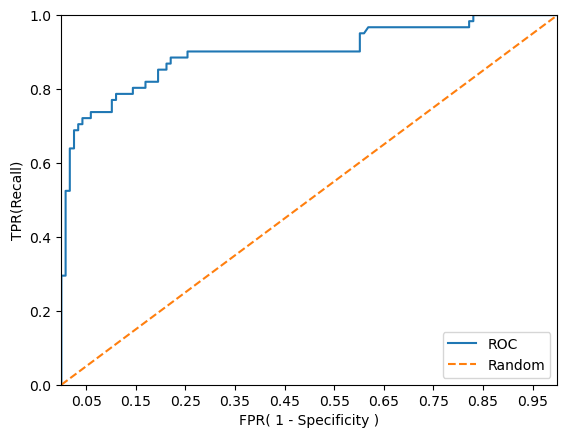

In [50]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음.
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1) 
    #ROC 곡선을 그래프 곡선으로 그림.
    plt.plot(fprs, tprs, label="ROC")
    # 가운데 대각선 직선을 그림.
    plt.plot([0, 1], [0, 1],'--', label="Random")
             
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등 
    start, end = plt.xlim() 
    plt.xticks(np.round(np.arange(start, end, 0.1), 2)) 
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Specificity )'); plt.ylabel('TPR(Recall)') 
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, pred_proba[:, 1])

In [54]:
# AUC
# 평가지표
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test,pred_proba)
roc_score


0.8979577660461239

In [53]:
# 분류 평가지표, 예측 확률값을 인수로 추가
def get_clf_eval(y_test, pred=None, pred_proba=None): 
    confusion = confusion_matrix(y_test, pred) 
    accuracy = accuracy_score(y_test, pred) 
    precision = precision_score(y_test, pred) 
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test,pred) 
    #ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba) 
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:f}, 정밀도: {1:4f}, 재현율: {2:4f},\
    F1: {3:.4f}, AUC:{4:4f}'.format(accuracy, precision, recall, f1, roc_auc))